## 1. Train the model

In [2]:
# load dataset
import tensorflow as tf
from utils.dataset import Dataset
from models.model import EfficientCapsNet

# loads dataset
dataset = Dataset(config_path='config_STSL.json')

# check dataset
dataset.print_ds_info()

[INFO] Dataset loaded!

Shapes of Datasets:
X_train: (2613, 128, 128, 1)
y_train: (2613, 11)
X_val: (327, 128, 128, 1)
y_val: (327, 11)
X_test: (327, 128, 128, 1)
y_test: (327, 11)


Class distribution:
Class    | train | val | test
Class 0  | 234   | 28  | 35  
Class 1  | 248   | 27  | 22  
Class 2  | 239   | 36  | 22  
Class 3  | 239   | 24  | 34  
Class 4  | 233   | 31  | 33  
Class 5  | 228   | 30  | 39  
Class 6  | 240   | 29  | 28  
Class 7  | 239   | 27  | 31  
Class 8  | 236   | 34  | 27  
Class 9  | 235   | 34  | 28  
Class 10 | 242   | 27  | 28  


In [5]:
# instantiate model
model_train = EfficientCapsNet(mode='train', verbose=True)

Model: "Efficient_CapsNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 128, 128, 1)]     0         
                                                                 
 conv2d_4 (Conv2D)           (None, 124, 124, 32)      832       
                                                                 
 batch_normalization_4 (Bat  (None, 124, 124, 32)      128       
 chNormalization)                                                
                                                                 
 conv2d_5 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_5 (Bat  (None, 61, 61, 64)        256       
 chNormalization)                                                
                                                                 
 conv2d_6 (Conv2D)           (None, 30, 30, 64)  

In [1]:
# train model
history = model_train.train(dataset, initial_epoch=0)

NameError: name 'model_train' is not defined

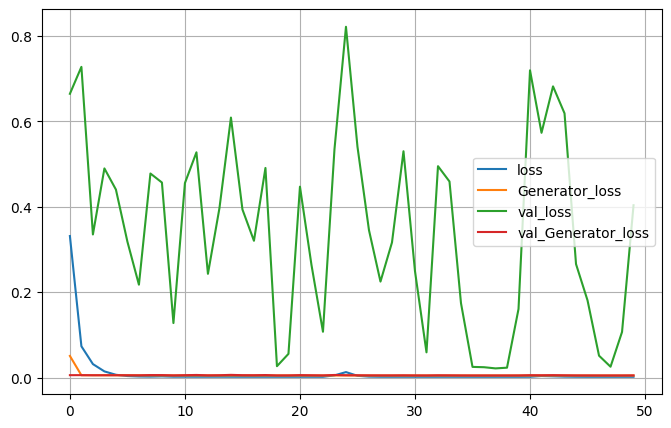

In [6]:
# Plot history
from utils.visualisation import plotImages, plotWrongImages, plotHistory

plotHistory(history)

## 2. Test model

In [3]:
# load test model
model_test = EfficientCapsNet(mode='test', verbose=True)
model_test.load_graph_weights()

Model: "Efficient_CapsNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 128, 128, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 124, 124, 32)      832       
                                                                 
 batch_normalization (Batch  (None, 124, 124, 32)      128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 61, 61, 64)        256       
 chNormalization)                                                
                                                                 
 conv2d_2 (Conv2D)           (None, 30, 30, 64)  

------------------------------STSL Evaluation------------------------------
 1/11 [=>............................] - ETA: 3s

2023-09-05 12:55:43.123151: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x2d491d2e0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2023-09-05 12:55:43.123288: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2023-09-05 12:55:43.256113: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


11/11 [==============================] - 1s 39ms/step
Test acc: 0.9908256880733946
Test error [%]: 0.9174%
N° misclassified images: 2 out of 327

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00        22
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        33
           5       0.97      1.00      0.99        39
           6       0.93      1.00      0.97        28
           7       1.00      0.94      0.97        31
           8       1.00      0.96      0.98        27
           9       1.00      1.00      1.00        28
          10       1.00      1.00      1.00        28

    accuracy                           0.99       327
   macro avg       0.99      0.99      0.99       327
weighted avg       0.99      0.99      0.99       327



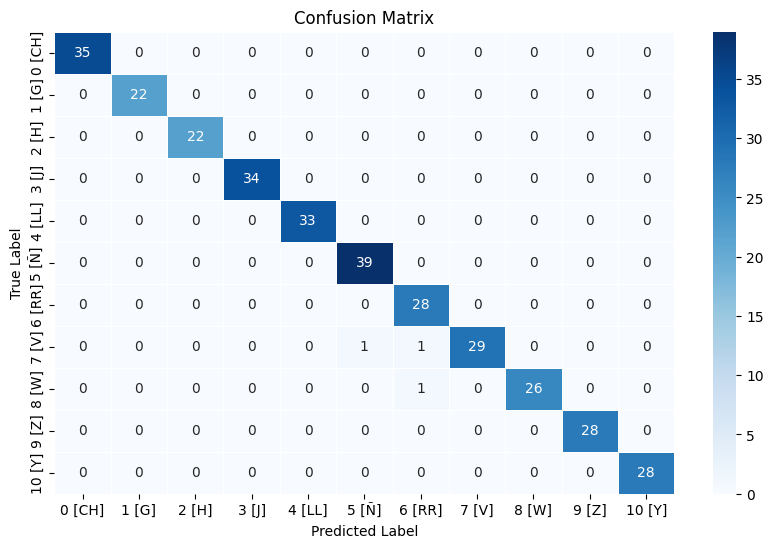

In [4]:
# evaluate
model_test.evaluate(dataset.X_test, dataset.y_test) 

(327, 128, 128, 1)
 5/11 [============>.................] - ETA: 0s

2023-09-04 21:41:31.983284: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x2c7bc2200 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2023-09-04 21:41:31.983302: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2023-09-04 21:41:31.999379: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


11/11 [==============================] - 1s 41ms/step


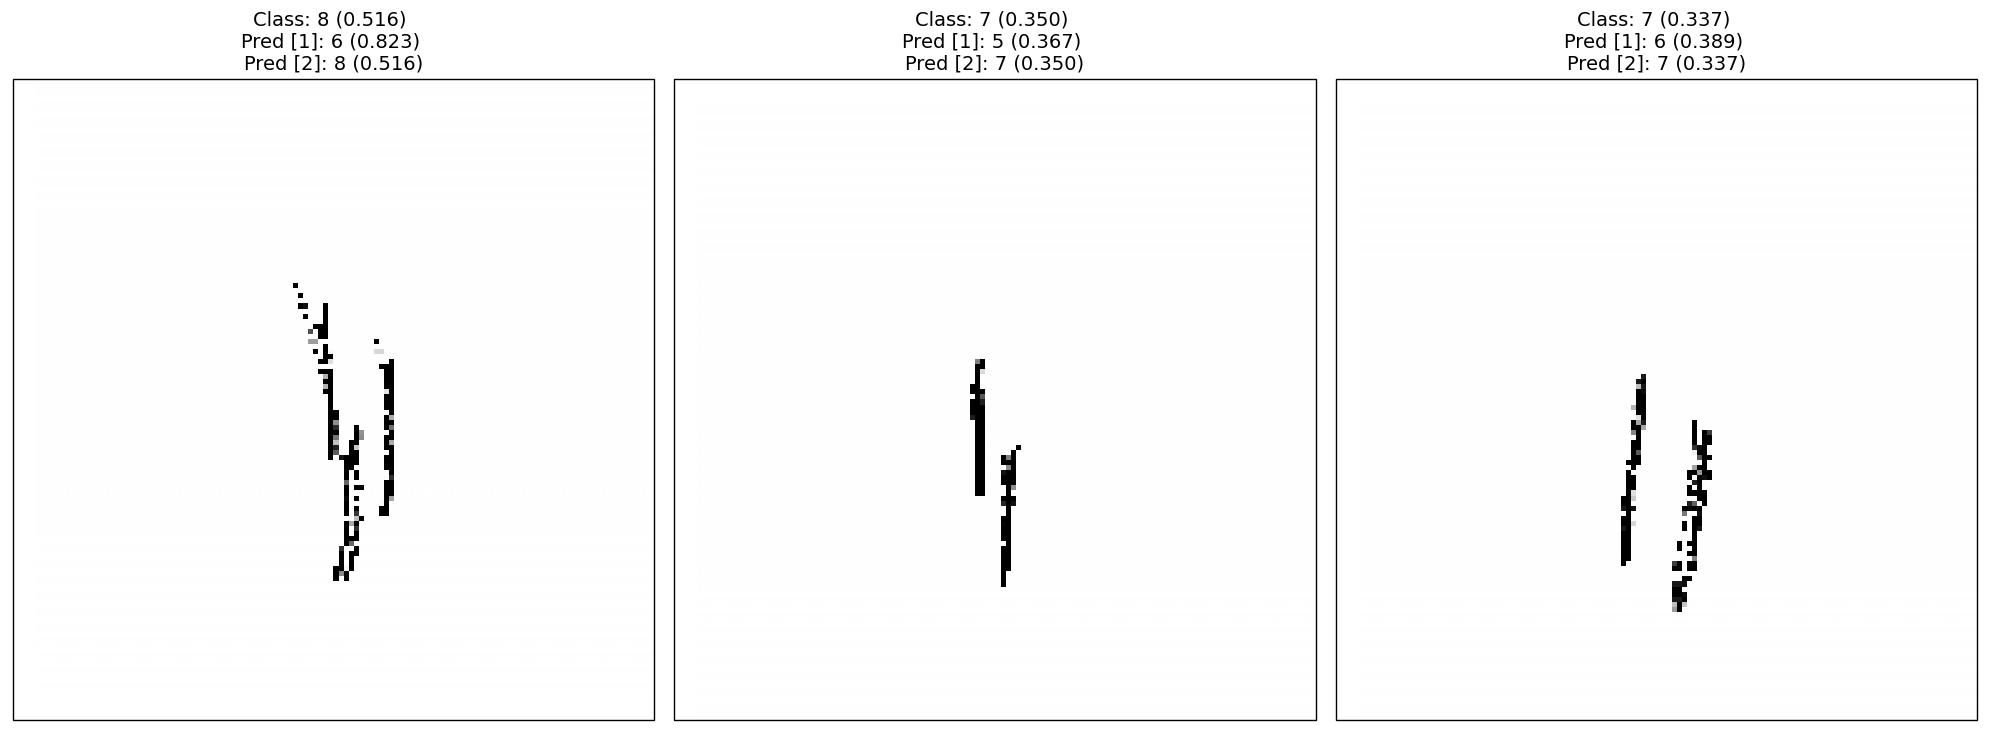

In [3]:
from utils.visualisation import plotWrongImages

print(dataset.X_test.shape)

# plot
y_pred = model_test.predict(dataset.X_test)[0]

n_images = 3
plotWrongImages(dataset.X_test, dataset.y_test, y_pred, 
                n_images, dataset.class_names)

 5/11 [============>.................] - ETA: 0s

2023-09-04 22:35:58.605017: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x117af6270 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2023-09-04 22:35:58.605037: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2023-09-04 22:35:58.621640: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


11/11 [==============================] - 1s 42ms/step


<Figure size 2000x3000 with 0 Axes>

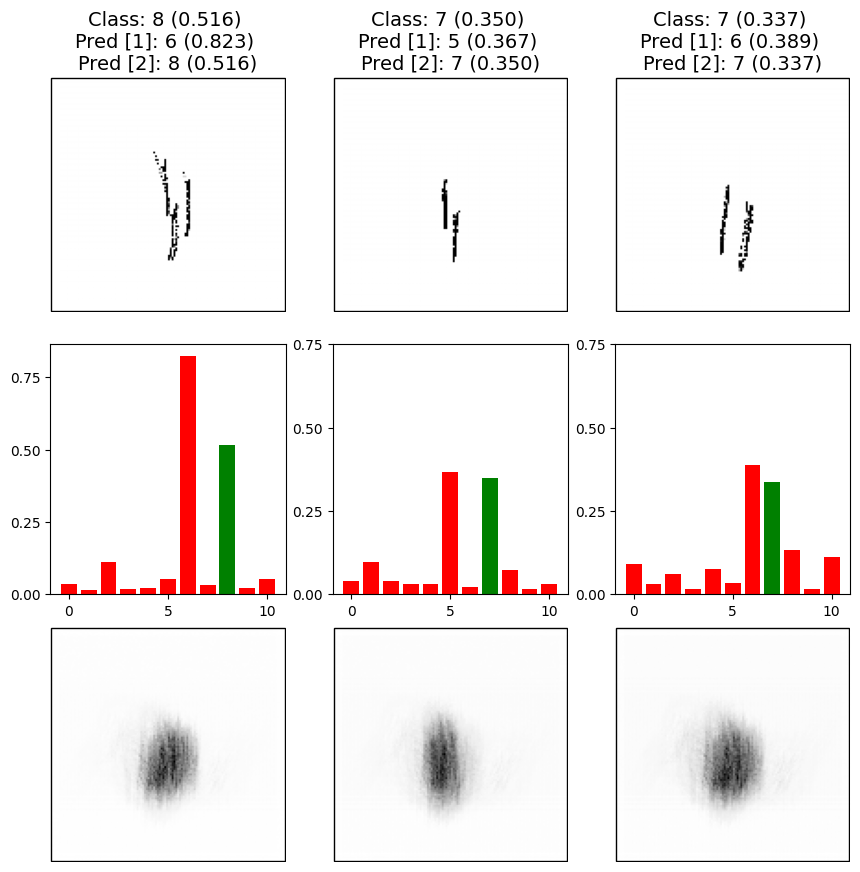

In [3]:
from utils.visualisation import plotWrongImagesWithCharts

y_pred, reconstructed_imgs = model_test.predict(dataset.X_test)

plotWrongImagesWithCharts(dataset.X_test, dataset.y_test, y_pred, reconstructed_imgs, 3, dataset.class_names)

## 3. Visualise generator reconstruction

11/11 [==============================] - 0s 37ms/step


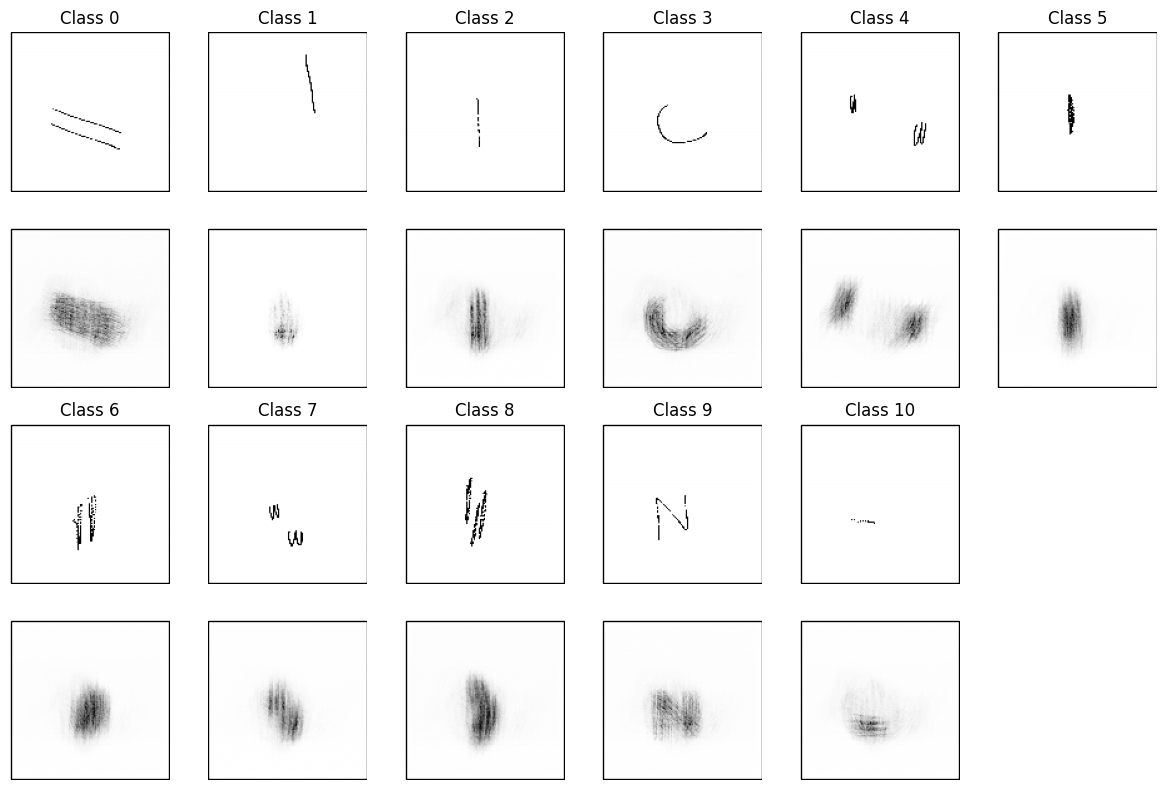

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# pass test data through model
capsule_outputs, reconstructed_images = model_test.predict(dataset.X_test)

# Function to decode one-hot encoded labels
def decode_onehot(onehot_encoded):
    return np.argmax(onehot_encoded)

# Fetch one instance of each class from the test set
class_indices = {i: None for i in range(11)}  # Assuming 11 classes, indexed 0 to 10

for idx, label in enumerate(dataset.y_test):
    label_decoded = decode_onehot(label)
    if class_indices[label_decoded] is None:
        class_indices[label_decoded] = idx
    if all(v is not None for v in class_indices.values()):  # Break once we've found one of each
        break


# Let's visualize the original and reconstructed images for each class
num_classes = 11
images_per_row = 6  # Number of images per row

plt.figure(figsize=(2*images_per_row, 8))  # Adjust the figure size

for i, (class_label, idx) in enumerate(class_indices.items()):
    
    row = (i // images_per_row) * 2  # Determine which row to place the original image in
    col = i % images_per_row   # Determine which column to place the image in
    
    # Original images
    plt.subplot(4, images_per_row, row * images_per_row + col + 1)
    plt.imshow(dataset.X_test[idx].reshape(128, 128), cmap='gray')
    plt.title(f"Class {class_label}")
    rect = patches.Rectangle((0, 0), 127, 127, linewidth=1, edgecolor='black', facecolor='none')
    plt.gca().add_patch(rect)
    plt.axis('off')
    
    # Reconstructed images
    plt.subplot(4, images_per_row, (row + 1) * images_per_row + col + 1)
    plt.imshow(reconstructed_images[idx].reshape(128, 128), cmap='gray')
    rect = patches.Rectangle((0, 0), 127, 127, linewidth=1, edgecolor='black', facecolor='none')
    plt.gca().add_patch(rect)
    plt.axis('off')

plt.tight_layout()
plt.show()


## Save the model

In [10]:
model_test.save_full_model('bin/model.keras')

Model saved successfully to bin/model.keras
